# LGM-VIP Data Science Internship - Jan 2022

# **Task 2 - Stock Market Prediction And Forecasting Using Stacked LSTM**

# Author :- AVIRUP MAZUMDER

Dataset link: https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

**bold text**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [ ]:
data.head() #shows first 5 rows of dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
data.tail() #shows last 5 rows of dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
#Sort the dataset according to the date
data['Date'] = pd.to_datetime(data['Date'])
df = data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


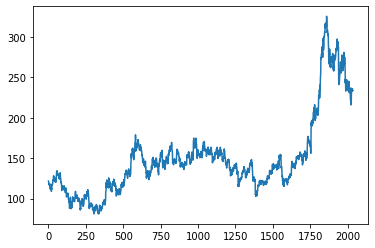

In [ ]:
plt.plot(df['Close'])

In [ ]:
df1 = df['Close']


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [1]:
training_size = int(len(df1)*0.70)
test_size = len(df1) - training_size


train_data = df1[0:training_size,:]
test_data = df1[training_size:len(df1), :1]

NameError: ignored

In [ ]:
training_size, test_size

In [ ]:
#convert an array of values into a dataset matrix
def datasetCrtd(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])

  return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = datasetCrtd(train_data, time_step)
X_test, ytest = datasetCrtd(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [ ]:
#Reshape input which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_split=0.1, epochs=60, batch_size=64, verbose=1)

Epoch 1/60
19/19 [==============================] - 12s 286ms/step - loss: 0.0102 - val_loss: 0.0013
Epoch 2/60
19/19 [==============================] - 4s 200ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 3/60
19/19 [==============================] - 4s 198ms/step - loss: 9.0117e-04 - val_loss: 0.0013
Epoch 4/60
19/19 [==============================] - 4s 197ms/step - loss: 8.4362e-04 - val_loss: 0.0011
Epoch 5/60
19/19 [==============================] - 4s 194ms/step - loss: 8.4313e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 4s 195ms/step - loss: 7.9915e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 4s 200ms/step - loss: 7.7236e-04 - val_loss: 0.0011
Epoch 8/60
19/19 [==============================] - 4s 195ms/step - loss: 7.5924e-04 - val_loss: 0.0010
Epoch 9/60
19/19 [==============================] - 4s 197ms/step - loss: 7.2710e-04 - val_loss: 9.3156e-04
Epoch 10/60
19/19 [==============================] - 4s 197ms/step 

In [ ]:
#Prediction of scaled test set
test_predict = model.predict(X_test)

In [ ]:
#transform to original test set
test_predict1 = scaler.inverse_transform(test_predict)

In [ ]:
test_predict1

array([[142.31029 ],
       [142.41286 ],
       [141.42754 ],
       [138.55984 ],
       [136.84485 ],
       [136.66768 ],
       [138.32626 ],
       [140.12187 ],
       [140.20932 ],
       [139.22472 ],
       [138.6304  ],
       [140.04332 ],
       [141.33357 ],
       [143.16792 ],
       [145.44469 ],
       [143.08176 ],
       [139.94801 ],
       [139.62408 ],
       [141.02634 ],
       [146.89569 ],
       [151.70816 ],
       [153.11426 ],
       [152.15204 ],
       [149.27615 ],
       [149.37354 ],
       [150.28528 ],
       [151.4235  ],
       [153.16629 ],
       [153.44817 ],
       [152.7259  ],
       [152.7232  ],
       [151.58821 ],
       [148.27002 ],
       [142.31487 ],
       [139.00072 ],
       [138.82985 ],
       [139.64401 ],
       [138.65533 ],
       [135.49176 ],
       [131.03497 ],
       [128.42462 ],
       [127.85032 ],
       [126.39461 ],
       [125.751205],
       [123.685265],
       [120.834625],
       [120.0276  ],
       [119.9

In [ ]:
import math
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
math.sqrt(mean_squared_error(ytest, test_predict)) # MSE Is low 

0.050503254087981904

# **Conclusion: Hence, we can conclude that the mean squared error is low and is 0.032445**